In [83]:
import pyreadr
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


result = pyreadr.read_r('toy.RData') # also works for Rds

# done! let's see what we got
# result is a dictionary where keys are the name of objects and the values python
# objects
print(result.keys()) # let's check what objects we got
df1 = result["toy"] # extract the pandas data frame for object df1

odict_keys(['toy'])


In [84]:
df1

,X1,X2,class
0,0.200798,0.678038,0
1,0.016620,1.576558,0
2,0.228725,-0.559534,0
3,0.126379,-0.093814,0
4,0.600821,-0.298395,0
...,...,...,...
992,-0.741708,-1.973571,1
993,-1.106395,-2.658774,1
994,-2.296385,-0.505279,1
995,1.022486,-1.802279,1


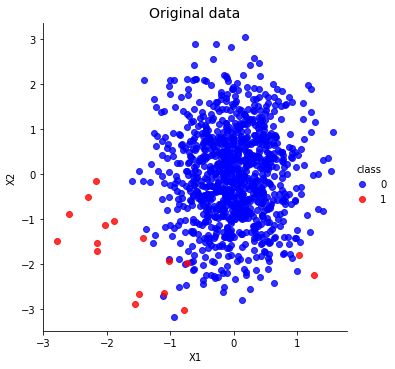

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot('X1', 'X2', df1, hue='class', palette=["b","r"], fit_reg=False)
ax = plt.gca();
ax.set_title("Original data",fontsize=14);

In [86]:
Target=df1['class']
df1.drop('class',axis=1, inplace=True)

In [87]:
from imblearn.under_sampling import RandomUnderSampler 
ros = RandomUnderSampler(random_state=0,sampling_strategy=0.06315789)
X_resampled, y_resampled = ros.fit_resample(df1,Target)

In [88]:
df2=pd.concat([X_resampled, y_resampled], axis=1)

In [89]:
df2

,X1,X2,class
0,0.143792,0.312365,0
1,-0.803509,0.539394,0
2,-0.634353,0.804421,0
3,-0.355619,-1.584057,0
4,0.638997,1.404504,0
...,...,...,...
281,-0.741708,-1.973571,1
282,-1.106395,-2.658774,1
283,-2.296385,-0.505279,1
284,1.022486,-1.802279,1


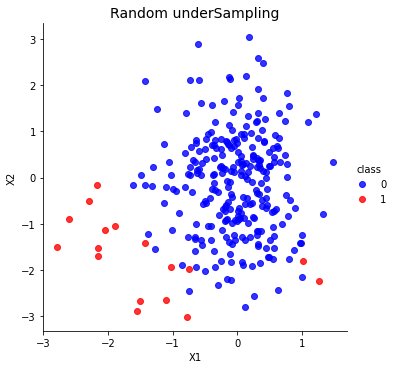

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot('X1', 'X2', df2, palette=["b","r"], hue='class', fit_reg=False)
ax = plt.gca();
ax.set_title("Random underSampling",fontsize=14);

In [91]:
df1_fraud=df1[Target=='1']
df1_normal=df1[Target=='0']

In [92]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(nu=0.118)
res = clf.fit_predict(df1_normal)
np.unique(res)

array([-1,  1], dtype=int64)

In [93]:
res[res==1] =0

In [94]:
df1_normal['class']=res
df1_fraud['class']=1

In [95]:
frames = [df1_normal, df1_fraud]
result = pd.concat(frames)
result[result['class']==-1].shape

(115, 3)

In [96]:
osvm_res=result[result['class']!=-1]
osvm_out=result[result['class']==-1]

In [97]:
osvm_t=pd.DataFrame(osvm_res['class'])
osvm_res.drop(['class'],axis=1,inplace=True)
osvm_ot=pd.DataFrame(osvm_out['class'])
osvm_out.drop(['class'],axis=1,inplace=True)

In [98]:
ros = RandomUnderSampler(random_state=0,sampling_strategy=0.06315789)
X_resampled, y_resampled = ros.fit_resample(osvm_res,osvm_t)
X_resampled=pd.concat([X_resampled, osvm_out])
y_resampled=pd.concat([y_resampled, osvm_ot])
y_resampled[y_resampled==-1]=0

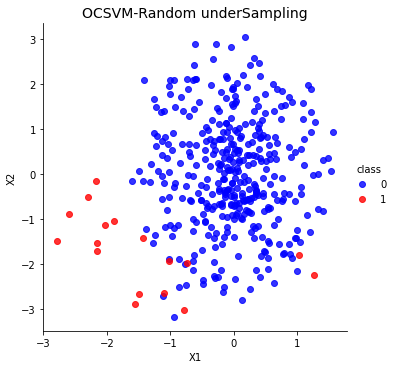

In [99]:
df2=pd.concat([X_resampled, y_resampled], axis=1)
sns.lmplot('X1', 'X2', df2, palette=["b","r"], hue='class', fit_reg=False)
ax = plt.gca();
ax.set_title("OCSVM-Random underSampling",fontsize=14);